In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [2]:
# Construct  an artificial dataset according to a linear model with additive noise
# What we want to do is recovering this model's parameters using the finite set of examples
# Our true parameters are w = (2, -3.4) and b = 4.2

def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [5]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

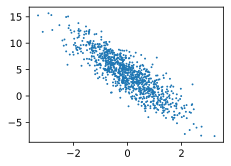

In [6]:
d2l.set_figsize()
# The semicolon is for displaying the plot only
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1)

In [8]:
# Reading the Datset
# Grabbing one minibatch of examples at a time, then use them to update our model

def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [9]:
# Initializing Model Parameters
# We need to have some parameters first

w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [10]:
# Next task is to update our parameters until they fit our data well
# Each update requires taking the gradient of our loss function with respect to the parameters
# Given this gradient, we can update each parameter in the direction that may reduce the loss

In [11]:
# Defining the Model

def linear_regression(X, w, b):
    return torch.matmul(X, w) + b

In [12]:
# Defining the Loss Function

def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [13]:
# Defining the Optimization Algorithm
# Applying  the minibatch stochastic gradient descent update

def sgd(params, lr, batch_size):
    # Minibatch stochastic gradient descent
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [15]:
# Training

lr = 0.03
num_epochs = 3
network = linear_regression
loss = squared_loss
batch_size = 10

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(network(X, w, b), y)   # Minibatch loss in X and y
        # Compute gradient on l w.r.t w and b
        l.sum().backward()
        sgd([w, b], lr, batch_size)   # Update parameters using their gradient
    with torch.no_grad():
        train_l = loss(network(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.047486
epoch 2, loss 0.000201
epoch 3, loss 0.000052


In [16]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 0.0003, -0.0006], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0006], grad_fn=<RsubBackward1>)
